<a href="https://colab.research.google.com/github/santiagonajera/Prophet-ejemplo/blob/main/prophet_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_4g0gcnq/sl4bn1hd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_4g0gcnq/7vo0jgoj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78388', 'data', 'file=/tmp/tmp_4g0gcnq/sl4bn1hd.json', 'init=/tmp/tmp_4g0gcnq/7vo0jgoj.json', 'output', 'file=/tmp/tmp_4g0gcnq/prophet_modelpl2c0xut/prophet_model-20250107180336.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:03:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:03:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


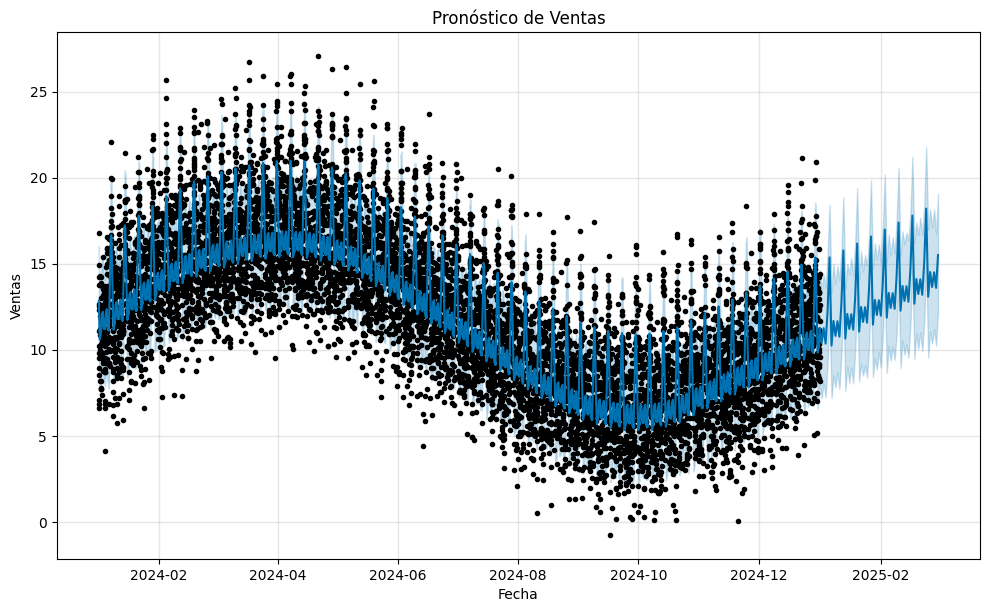

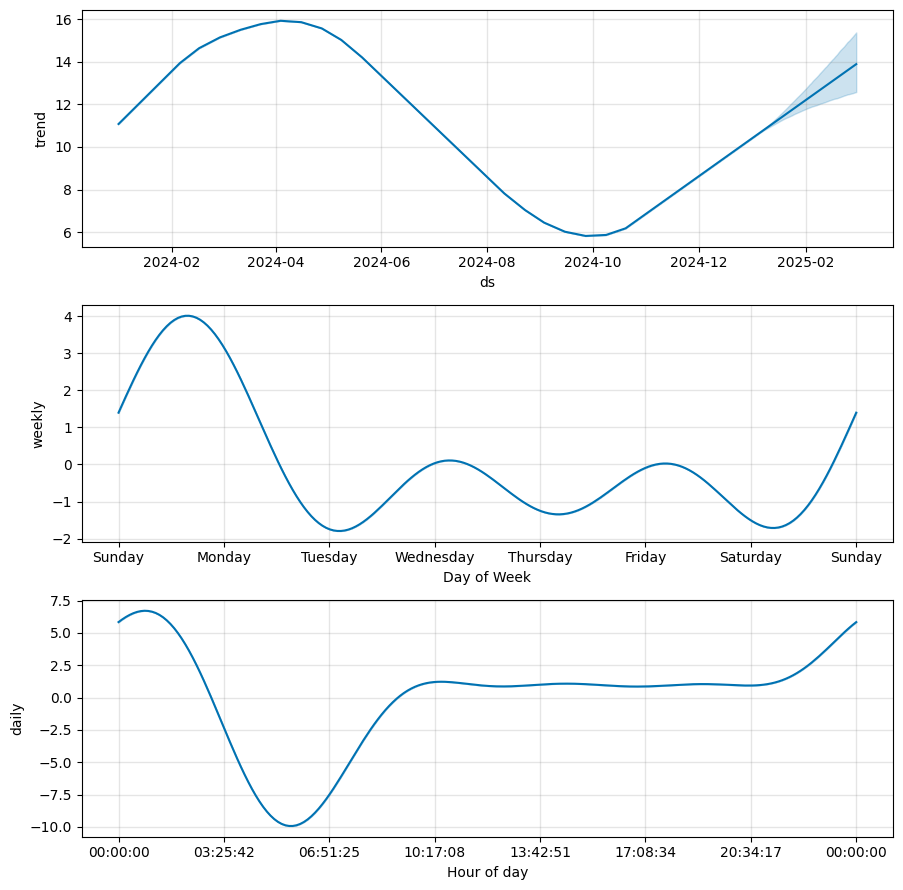

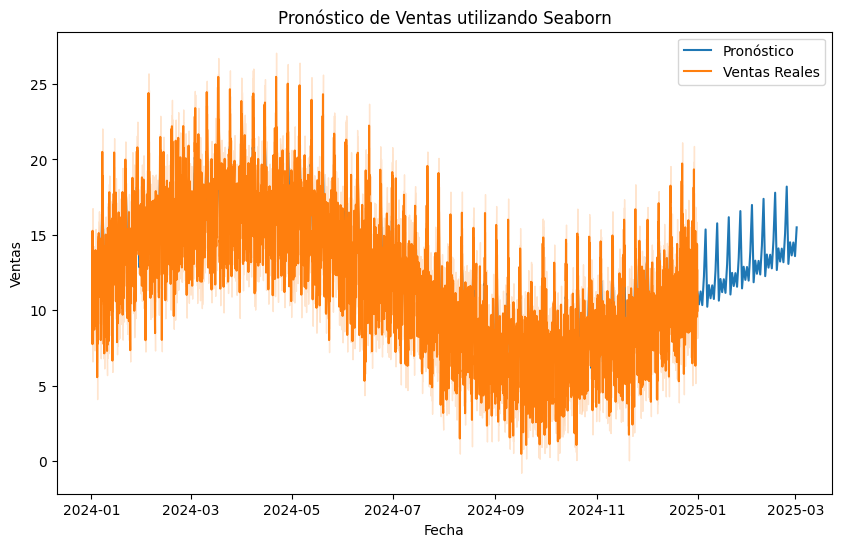

In [2]:
import pandas as pd
from prophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo Excel
url = 'https://github.com/santiagonajera/Prophet-ejemplo/raw/refs/heads/main/ventas_diarias_restaurante.xlsx'
df = pd.read_excel(url)

# Asegurarse de que las columnas tengan los nombres correctos
df.columns = ['ds', 'y']

# Crear el modelo Prophet
model = Prophet()
model.fit(df)

# Crear un DataFrame para los próximos 2 meses
future = model.make_future_dataframe(periods=60)  # 60 días aproximadamente 2 meses

# Realizar el pronóstico
forecast = model.predict(future)

# Graficar el pronóstico utilizando Prophet
fig = model.plot(forecast)
plt.title('Pronóstico de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

# Graficar los componentes del pronóstico
model.plot_components(forecast)
plt.show()

# Graficar utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=forecast, x='ds', y='yhat', label='Pronóstico')
sns.lineplot(data=df, x='ds', y='y', label='Ventas Reales')
plt.title('Pronóstico de Ventas utilizando Seaborn')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()
